In [1]:
%matplotlib inline

In [12]:
import os
import pandas as pd
import calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))

In [32]:
df = pd.read_csv(os.path.join('data', 'my_garmin_data.tsv'), sep='\t', parse_dates=['date'])

In [44]:
df['steps_k_cnt'] = df.apply(lambda row: round(row['steps_cnt'] / 1000), axis=1)

In [45]:
df

,date,steps_cnt,min_hr,min_avg_hr,max_avg_hr,max_hr,resting_hr,sleep_start,sleep_end,steps_k_cnt
0,2018-10-20,4427,45,47,121,132,45,2018-10-19 20:00:00,2018-10-20 03:00:00,4
1,2018-10-21,7579,54,55,113,120,54,2018-10-20 20:24:00,2018-10-21 04:54:00,8
2,2018-10-22,8615,45,48,121,133,56,2018-10-21 20:22:00,2018-10-22 05:16:00,9
3,2018-10-23,5702,50,51,124,136,55,2018-10-22 22:35:00,2018-10-23 06:05:00,6
4,2018-10-24,6783,45,46,117,124,55,2018-10-23 20:57:00,2018-10-24 04:52:00,7
...,...,...,...,...,...,...,...,...,...,...
1279,2022-04-21,4591,47,49,106,106,55,2022-04-21 03:40:00,2022-04-21 10:45:00,5
1280,2022-04-22,8377,49,52,107,109,55,2022-04-22 02:33:00,2022-04-22 09:55:00,8
1281,2022-04-23,7470,52,52,108,111,55,2022-04-23 03:04:00,2022-04-23 10:49:00,7
1282,2022-04-24,4058,52,53,107,108,55,2022-04-24 03:19:00,2022-04-24 10:44:00,4


In [46]:
steps = pd.Series(df['steps_k_cnt'].values, index=df['date'])
steps

date
2018-10-20    4
2018-10-21    8
2018-10-22    9
2018-10-23    6
2018-10-24    7
             ..
2022-04-21    5
2022-04-22    8
2022-04-23    7
2022-04-24    4
2022-04-25    2
Length: 1284, dtype: int64

In [50]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [55]:
steps_cmap = ListedColormap(['#f3a0bc'] * 5 + ['#f8e447'] * 5 + ['#99ff66'] * 5 + ['#35cb33'] * 5 + ['#008001'] * 15)

(<Figure size 1250x850 with 6 Axes>,
 array([<AxesSubplot: ylabel='2018'>, <AxesSubplot: ylabel='2019'>,
        <AxesSubplot: ylabel='2020'>, <AxesSubplot: ylabel='2021'>,
        <AxesSubplot: ylabel='2022'>], dtype=object))

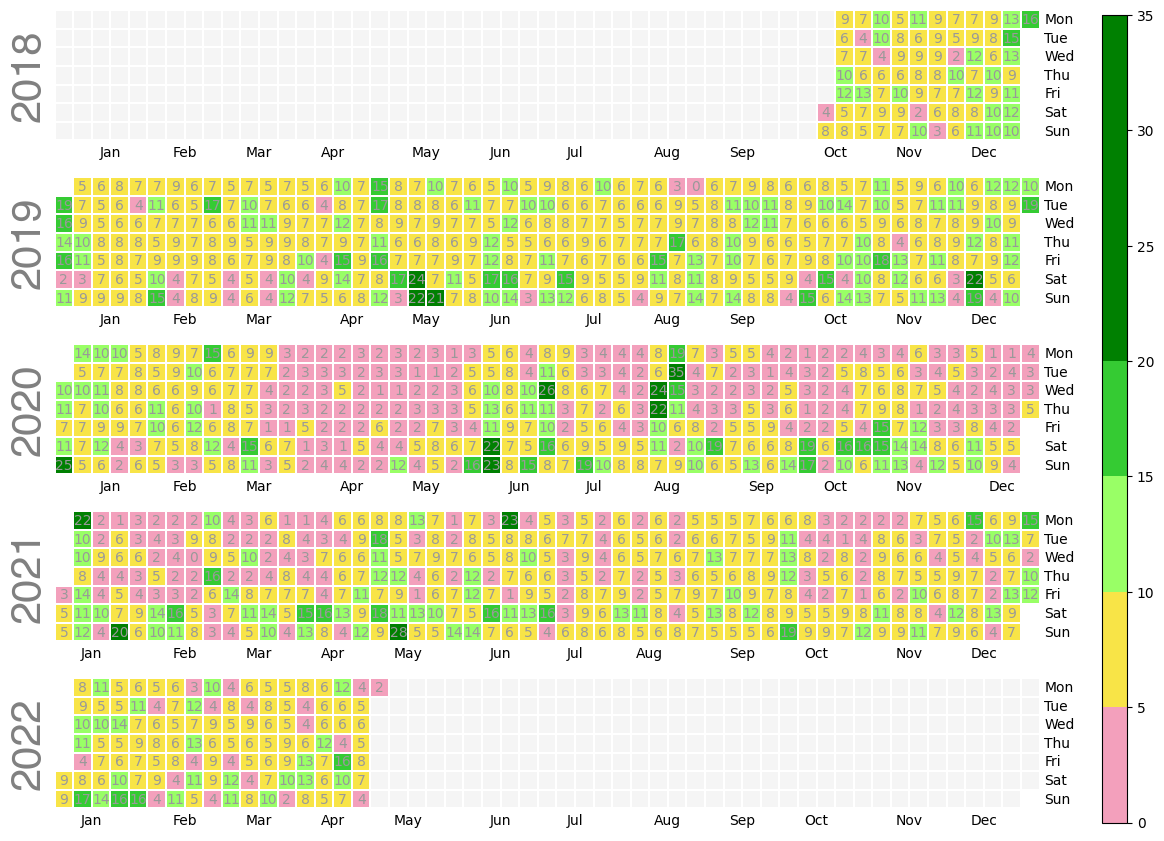

In [67]:
calplot.calplot(steps,
                textformat='{:.0f}',
                textcolor='#999999',
                cmap=steps_cmap,
                linewidth=0.005,
                edgecolor='white'
               )